In [1]:
import numpy as np # scientific computation
import pandas as pd # loading dataset file
import matplotlib.pyplot as plt # visulization
import nltk # preprocessing our text
from nltk.corpus import stopwords # removing all the stop words



In [ ]:
#load our dataset
df = pd.read_csv("/content/sample_data/spam (1).csv",encoding="latin")
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
#give concise summary of a dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#returns the sum fo all na values
df.isna().sum()


v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df.rename({"v1":"label","v2":"text"},inplace=True,axis=1)

In [ ]:
#bottom 5 rows of the dataframe
df.tail()


,label,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [ ]:
X = df
y = df

In [ ]:
#splitting data into train and validation sets using train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
##train size 80% and test size 20%

In [ ]:
### Given data is imbalanced one, w are balancing the data

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))


TypeError: ignored

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
import re
Corpus = []
length = len(df)


In [ ]:
for i in range(0,length):
    text = re.sub("[^a-zA-Z0-9]"," ",df["text"][i])
    text = text.lower()
    text = text.split()
    pe = PorterStemmer()
    stopword = stopwords.words("english")
    text = [pe.stem(word) for word in text if not word in set(stopword)]
    text = " ".join(text)
    Corpus.append(text)

In [ ]:
Corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send 1 50 rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'winner valu network custom select receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6day 16 tsandc appli repli hl 4 info',
 'urgent 1 week free mem

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=35000)
x = cv.fit_transform(corpus).toarray()


NameError: ignored

In [ ]:
impot  pickle ##  importing pickle used for dumping models
pickle.dump(cv,open('cv1.pk1', 'wb')) ## saving to into cv.pkl file

SyntaxError: ignored

In [ ]:
df.describe()

,label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
df.shape

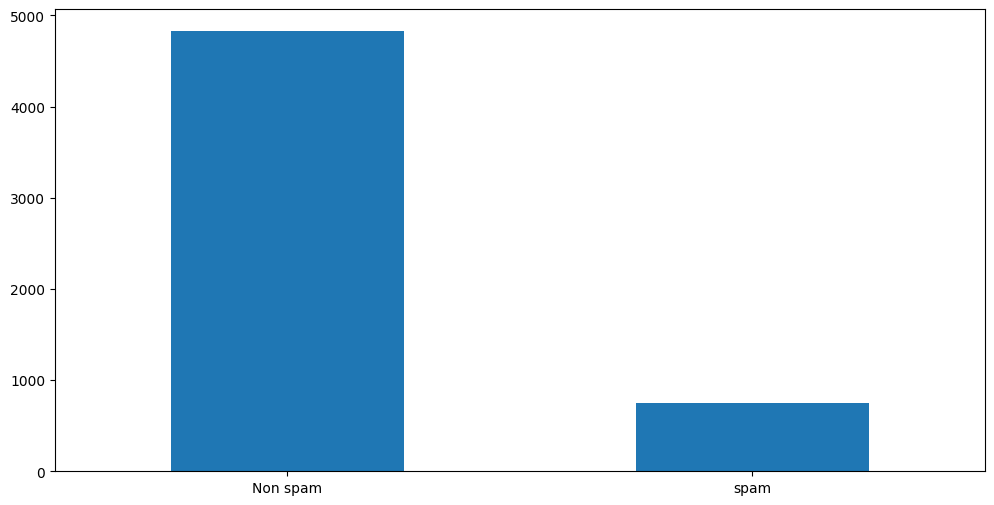

In [ ]:
df["label"].value_counts().plot(kind="bar",figsize=(12,6))
plt.xticks(np.arange(2), ('Non spam', 'spam'),rotation=0);

In [ ]:
#Splitting data into train and validation sets using train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 0)
##train size 80% and test size 20%

NameError: ignored

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train_res, y_train_res)

NameError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model1 =RandomForestClassifier()
model1.fit(X_train_res, y_train_res)

NameError: ignored

In [ ]:
from sklearn.native_bayes import multinomia1NB
model = Multinomia1NB()


ModuleNotFoundError: ignored

In [ ]:
#fitting the model to the training sets
model.fit(X_train_res, y_train_res)

NameError: ignored

In [ ]:
from tensorflow.keras.models import sequential
from tensorflow.keras.layers import dense

ImportError: ignored

In [ ]:
#fitting the model to the training sets
model = Sequential()


NameError: ignored

In [ ]:
x_train_shape

NameError: ignored

In [ ]:
model.add(dense(units  = x_train_res.shape[1],activation="relu",kernel_initializer="random_uniform"))


AttributeError: ignored

In [ ]:
model.add(dense(units=100,activation="relu",kernel_initializer="random_uniform"))


In [ ]:
model.add(dense(units=100,activation="relu",kernel_initializer="random_uniform"))


NameError: ignored

In [ ]:
model.add(dense(units=100,activation="sigmoid"))

AttributeError: ignored

In [ ]:
model.compile(optimizer="adam",loss="binery_crossentropy",metrics=['accuracy'])

AttributeError: ignored

In [ ]:
generator = model.fit(X_train_res,y_train_res,epoch=len(X_train_res)//64)

NameError: ignored

In [ ]:
generator = model.fit(X_train_res,y_train_res,epoch=10,steps_per_epoch=len(X_train_res)//64)

NameError: ignored

In [ ]:
y_pred=model.predict(x_test)
y_pred

NameError: ignored

In [ ]:
y_pr = np.Where(y_pred>0.5,1,0)

AttributeError: ignored

In [ ]:
y_test

In [ ]:
from  sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pr)
score = accuracy_score(y_test,y_pr)
print(cm)
print('Accuracy score Is:- '  ,score*100)

NameError: ignored

In [ ]:
def new_review(new_review):
  new_review = new_review
  new_review = re.sub('[^a-zA-Z]', ' ',new_review)
  new_review = new_review.lower()
  new_review = new_review.split()
  ps = porterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  new_review = [Ps.stem(w(ord) for word in new_review if not word in   set(all_stopwords)]
  new_review = '  ' .join(new_review)
  new_corpus = [new_review]
  new_x_test = cv.transform(new_corpus).toarray()
  print(new_x_test)
  new_y_pred =loaded_model.predict(new_x_test)
  print(new_y_pred)
  new_x_pred = np.where(new_y_pred>0.5,1,0)
  return new_y_pred
new_review = new_review(str(input("Enter new review...")))

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test,y_pred)
print(cm)
print('Accuracy Score Is Naive bayes:- ' ,score*100)

NameError: ignored

In [ ]:
cm = confusion_matrix(y--test, y_pred)
score = accuracy_score(y_test,y_pred)
print(cm)
print('Accuracy Score Is:- ' ,score*100)

cm1 = confusion_matrix(y_test, y_pred1)
score1 = accuracy_score(y_test,y_pred1)
print(cm1)
print('Accuracy Score Is:- ' ,score1*100)

NameError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pr)
score = accuracy_score(y_test,y_pr)
print(cm)
print('Accuracy Score Is:-  ' ,score*100)


NameError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pr)
score = accuracy_score(y_test,y_pr)
print(cm)
print('Accuracy score Is:-  '  ,score*100)


In [ ]:
model.save('spam.h5')

AttributeError: ignored

In [ ]:
#importing essential libraries
from flask import flask, render_template, request
import pickle
import numby as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import porterStemmer
from tensorflow.keras.models import loaded_model

In [ ]:
loaded_model = load_model('spam.h5')
cv = pickle.load(open('cv1.pkl','rb'))
app = flask(__name__)